In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing

In [18]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [19]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [20]:
df.head()

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [21]:
df.drop(['id', 'key', 'pickup_datetime'], axis=1, inplace=True)

In [22]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [23]:
df = df[df['passenger_count'] <= 8]

In [24]:
df = df[df['fare_amount'] > 0]

<AxesSubplot:xlabel='fare_amount'>

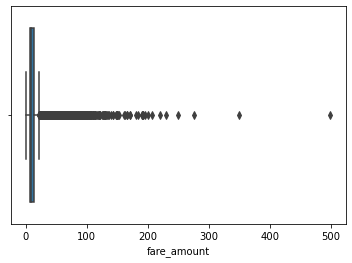

In [25]:
sns.boxplot(x='fare_amount', data=df)

In [26]:
q1=np.percentile(df['fare_amount'], 25, interpolation='midpoint')
q3=np.percentile(df['fare_amount'], 75, interpolation='midpoint')
iqr=q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr

In [27]:
df[(df['fare_amount'] < lower) | (df['fare_amount'] > upper)][{'fare_amount'}]

,fare_amount
6,24.50
30,25.70
34,39.50
39,29.00
48,56.80
...,...
199976,49.70
199977,43.50
199982,57.33
199985,24.00


In [28]:
df = df[(df['fare_amount'] >= lower) & (df['fare_amount'] <= upper)]

<AxesSubplot:xlabel='fare_amount'>

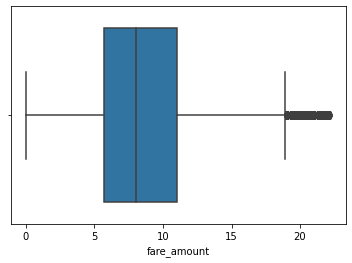

In [29]:
sns.boxplot(x="fare_amount", data=df)

In [30]:
corr_matrix=round(df.corr(),2)

<AxesSubplot:>

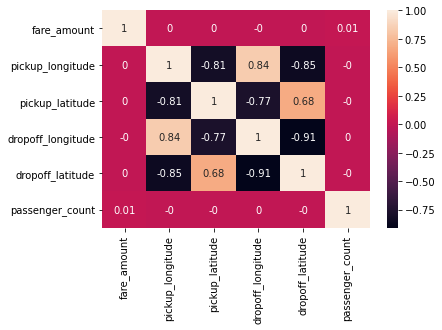

In [31]:
sns.heatmap(corr_matrix, annot=True)

In [32]:
x = df.drop('fare_amount', axis=1)

In [33]:
y= df['fare_amount']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [37]:
ss = preprocessing.StandardScaler()
x_train =  ss.fit_transform(x_train)
x_test = ss.transform(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [38]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred = lrmodel.predict(x_test)

In [40]:
print("Regression Coefficients : ", lrmodel.coef_)
print("Intercept : ", lrmodel.intercept_)

Regression Coefficients :  [ 0.0453762   0.02750221 -0.04034441 -0.0231377   0.05297823]
Intercept :  8.93178023465704


In [41]:
print("Linear regression Model :")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:',metrics.r2_score(y_test, y_pred))

Linear regression Model :
MSE: 17.262034322232015
MAE: 3.296635651660586
RMSE: 4.154760441016066
R2 Score: 0.0001556772040861576


In [42]:
rfrmodel = RandomForestRegressor(n_estimators=10, random_state=1)

In [43]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [44]:
print("Random forest regression model : ")
print("MSE:", mean_squared_error(y_test, rfrmodel_pred))
print("MAE:", mean_absolute_error(y_test, rfrmodel_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rfrmodel_pred)))
print('R2 Score:',metrics.r2_score(y_test, rfrmodel_pred))

Random forest regression model : 
MSE: 5.500605871667981
MAE: 1.6526312025312802
RMSE: 2.3453370486281884
R2 Score: 0.6813962103156118
